In [1]:
import tqdm
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from mnist_loader import MNISTDataset, train_test_split
from autoencoders import (
    SimpleEncoder, 
    SimpleDecoder, 
    DeepEncoder,
    DeepDecoder,
    AutoEncoder
)
from functions import train_model

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
torch.random.manual_seed(42)

LATENT_DIM = 20

In [3]:
mnist = datasets.MNIST('/home/andrei/datasets') 
# use data and targets only, supports __getitem__, 60000 images 28x28 px

In [4]:
train, test, plot_idx, labels = train_test_split(train_ratio=0.8, mnist=mnist)

In [5]:
image_transforms = transforms.ToTensor()
trainset = MNISTDataset(train, mnist, image_transforms)
testset = MNISTDataset(test, mnist, image_transforms)

In [6]:
trainloader = DataLoader(trainset, shuffle=True, batch_size=128, num_workers=2)
testloader = DataLoader(testset, shuffle=False, batch_size=128, num_workers=2)

In [7]:
encoder = SimpleEncoder(num_features=LATENT_DIM)
decoder = SimpleDecoder(num_features=LATENT_DIM)

model = AutoEncoder(encoder, decoder)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

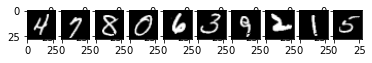

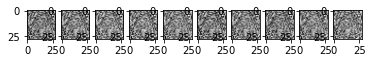

test loss: 65.31006413698196
 Epoch 0, train loss: 107.0165093690157, test loss: 19.267035454511642


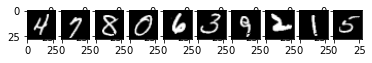

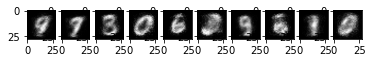

 Epoch 1, train loss: 69.6355040371418, test loss: 15.936018601059914


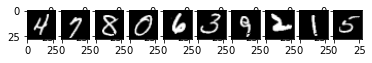

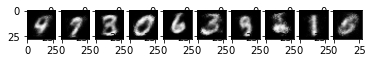

 Epoch 2, train loss: 60.84069183468819, test loss: 14.527517050504684


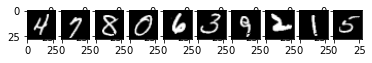

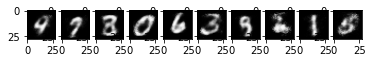

 Epoch 3, train loss: 56.706561639904976, test loss: 13.80992916226387
 Epoch 4, train loss: 54.52553831040859, test loss: 13.398062512278557
 Epoch 5, train loss: 53.13763551414013, test loss: 13.113692536950111
 Epoch 6, train loss: 52.14154639840126, test loss: 12.892022348940372
 Epoch 7, train loss: 51.43147747218609, test loss: 12.74794615805149
 Epoch 8, train loss: 50.938006438314915, test loss: 12.648031681776047
 Epoch 9, train loss: 50.62812215089798, test loss: 12.589136354625225


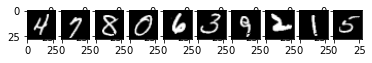

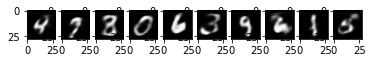

 Epoch 10, train loss: 50.41867160797119, test loss: 12.549264810979366
 Epoch 11, train loss: 50.285502061247826, test loss: 12.52512826025486
 Epoch 12, train loss: 50.17684254050255, test loss: 12.50599581003189
 Epoch 13, train loss: 50.10346223413944, test loss: 12.494014948606491
 Epoch 14, train loss: 50.03321795165539, test loss: 12.490019880235195
 Epoch 15, train loss: 49.97882404178381, test loss: 12.462066859006882
 Epoch 16, train loss: 49.93102486431599, test loss: 12.449866883456707
 Epoch 17, train loss: 49.886373825371265, test loss: 12.432189285755157
 Epoch 18, train loss: 49.84541726112366, test loss: 12.442564606666565
 Epoch 19, train loss: 49.81034741550684, test loss: 12.424636915326118


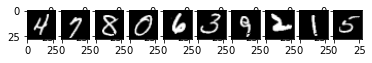

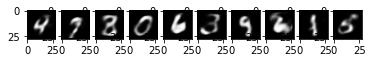

 Epoch 20, train loss: 49.77599394321442, test loss: 12.422267980873585
 Epoch 21, train loss: 49.740420050919056, test loss: 12.413425542414188
 Epoch 22, train loss: 49.71144761145115, test loss: 12.39510715007782
 Epoch 23, train loss: 49.671856097877026, test loss: 12.392679795622826
 Epoch 24, train loss: 49.64489945024252, test loss: 12.394554778933525
 Epoch 25, train loss: 49.624639704823494, test loss: 12.393606320023537
 Epoch 26, train loss: 49.60000590234995, test loss: 12.377398267388344
 Epoch 27, train loss: 49.570583418011665, test loss: 12.36385252326727
 Epoch 28, train loss: 49.54101426154375, test loss: 12.361133694648743
 Epoch 29, train loss: 49.52325000613928, test loss: 12.358533091843128


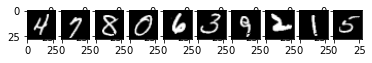

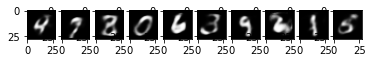

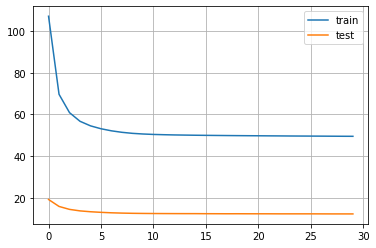

In [8]:
model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    image_transforms=image_transforms,
    loss_fn=loss_fn,
    mnist=mnist,
    trainloader=trainloader,
    testloader=testloader,
    plot_idx=plot_idx
)

In [7]:
encoder = DeepEncoder(num_features=LATENT_DIM)
decoder = DeepDecoder(num_features=LATENT_DIM)

model = AutoEncoder(encoder, decoder)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

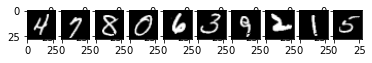

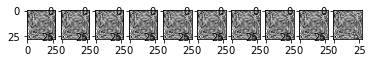

test loss: 65.25758522748947
 Epoch 0, train loss: 107.24680645763874, test loss: 21.827667146921158


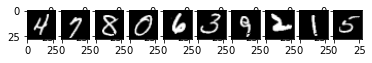

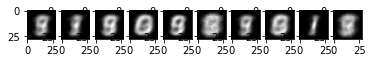

 Epoch 1, train loss: 80.87166775763035, test loss: 18.52568380534649


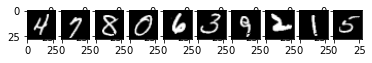

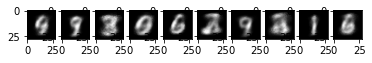

 Epoch 2, train loss: 67.8821344524622, test loss: 15.938894897699356


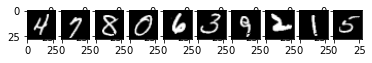

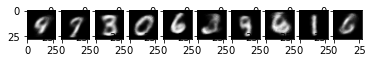

 Epoch 3, train loss: 61.63805554807186, test loss: 14.820964276790619
 Epoch 4, train loss: 57.54193764925003, test loss: 13.893674850463867
 Epoch 5, train loss: 54.821960136294365, test loss: 13.486750558018684
 Epoch 6, train loss: 53.31865318119526, test loss: 13.092062622308731
 Epoch 7, train loss: 51.834924668073654, test loss: 12.790529169142246
 Epoch 8, train loss: 50.70851989835501, test loss: 12.527146615087986
 Epoch 9, train loss: 49.78463839739561, test loss: 12.323559440672398


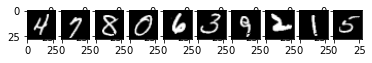

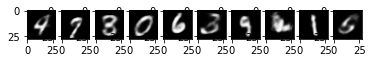

 Epoch 10, train loss: 49.02696381509304, test loss: 12.181268773972988
 Epoch 11, train loss: 48.411086209118366, test loss: 12.03306633234024
 Epoch 12, train loss: 47.913013234734535, test loss: 11.906754605472088
 Epoch 13, train loss: 47.464805483818054, test loss: 11.828266859054565
 Epoch 14, train loss: 47.06984629482031, test loss: 11.721129052340984
 Epoch 15, train loss: 46.720319487154484, test loss: 11.631656490266323
 Epoch 16, train loss: 46.41828755289316, test loss: 11.586345538496971
 Epoch 17, train loss: 46.12986695766449, test loss: 11.507103309035301
 Epoch 18, train loss: 45.8178224414587, test loss: 11.414762020111084
 Epoch 19, train loss: 45.47609858214855, test loss: 11.34093663096428


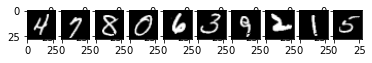

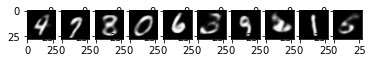

 Epoch 20, train loss: 45.15201023221016, test loss: 11.268124870955944
 Epoch 21, train loss: 44.876799404621124, test loss: 11.204042442142963
 Epoch 22, train loss: 44.62233155220747, test loss: 11.145039938390255
 Epoch 23, train loss: 44.38416261970997, test loss: 11.076022244989872
 Epoch 24, train loss: 44.14693021029234, test loss: 11.028244763612747
 Epoch 25, train loss: 43.89164339751005, test loss: 10.962541036307812
 Epoch 26, train loss: 43.6281364262104, test loss: 10.907970488071442
 Epoch 27, train loss: 43.41597443073988, test loss: 10.878095552325249
 Epoch 28, train loss: 43.212823644280434, test loss: 10.791405811905861
 Epoch 29, train loss: 43.02647686004639, test loss: 10.787216566503048


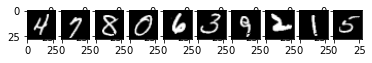

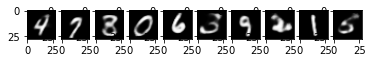

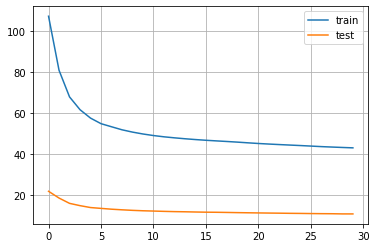

In [8]:
model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    image_transforms=image_transforms,
    loss_fn=loss_fn,
    mnist=mnist,
    trainloader=trainloader,
    testloader=testloader,
    plot_idx=plot_idx
)